In [1]:
from graphviz import Digraph

In [2]:
class KnowledgeBase:
    def __init__(self):
        # Store facts as a set and rules as a list
        self.facts = set()
        self.rules = []

    def add_fact(self, fact):
        self.facts.add(fact)

    def add_rule(self, rule):
        self.rules.append(rule)

In [3]:
class Rule:
    def __init__(self, conditions, conclusion):
        """
        conditions: list of facts required for the rule to fire
        conclusion: the fact to add if the conditions are met
        """
        self.conditions = conditions
        self.conclusion = conclusion

    def is_applicable(self, facts):
        # Check if every condition in the rule exists in the current set of facts
        return all(condition in facts for condition in self.conditions)

In [4]:
class InferenceEngine:
    def __init__(self, kb):
        self.kb = kb

    def forward_chain(self):
        # Continue to apply rules until no new facts can be added
        new_fact_added = True
        while new_fact_added:
            new_fact_added = False
            for rule in self.kb.rules:
                if rule.is_applicable(self.kb.facts) and rule.conclusion not in self.kb.facts:
                    print(f"Rule fired: IF {rule.conditions} THEN {rule.conclusion}")
                    self.kb.add_fact(rule.conclusion)
                    new_fact_added = True

In [5]:
class Visualizer:
    def __init__(self, kb):
        self.kb = kb

    def visualize(self, filename='expert_system'):
        dot = Digraph(comment="Expert System Knowledge Base")
        # Create nodes for all current facts (displayed as blue ellipses)
        for fact in self.kb.facts:
            dot.node(fact, fact, shape='ellipse', style='filled', fillcolor='lightblue')

        # Create nodes for rules (displayed as grey boxes) and connect conditions to rules and rules to conclusions.
        for i, rule in enumerate(self.kb.rules):
            rule_node = f"Rule_{i + 1}"
            rule_label = f"IF\n" + "\nAND\n".join(rule.conditions) + f"\nTHEN\n{rule.conclusion}"
            dot.node(rule_node, rule_label, shape='box', style='filled', fillcolor='lightgrey')
            # Edge from each condition to the rule node
            for cond in rule.conditions:
                dot.edge(cond, rule_node)
            # Edge from rule node to its conclusion
            dot.edge(rule_node, rule.conclusion)

        # Render the graph to a file (PNG) and open it
        dot.render(filename, view=True, format='png')
        return dot

In [6]:
kb = KnowledgeBase()

In [7]:
kb.add_fact("fever")
kb.add_fact("cough")
kb.add_fact("body_aches")
kb.add_fact("loss_of_taste")
kb.add_fact("sore_throat")
kb.add_fact("runny_nose")
kb.add_fact("mild_fever")

In [8]:
# Rule 1: If a patient has fever and cough, then they are a possible flu case.
rule1 = Rule(["fever", "cough"], "possible_flu")
# Rule 2: If a patient has body aches and is a possible flu case, then diagnose flu.
rule2 = Rule(["body_aches", "possible_flu"], "diagnose_flu")
# Rule 3: If a patient has fever and loss of taste, then they are a possible COVID case.
rule3 = Rule(["fever", "loss_of_taste"], "possible_covid")
# Rule 4: If a patient has cough and loss of taste, then they are also a possible COVID case.
rule4 = Rule(["cough", "loss_of_taste"], "possible_covid")
# Rule 5: If a patient has a sore throat and runny nose, then they are a possible cold case.
rule5 = Rule(["sore_throat", "runny_nose"], "possible_cold")
# Rule 6: If a patient is a possible COVID case and has loss of taste, then diagnose COVID.
rule6 = Rule(["possible_covid", "loss_of_taste"], "diagnose_covid")
# Rule 7: If a patient is a possible cold case and has mild fever, then diagnose cold.
rule7 = Rule(["possible_cold", "mild_fever"], "diagnose_cold")

In [9]:
# Add all rules to the knowledge base
kb.add_rule(rule1)
kb.add_rule(rule2)
kb.add_rule(rule3)
kb.add_rule(rule4)
kb.add_rule(rule5)
kb.add_rule(rule6)
kb.add_rule(rule7)

In [10]:
# Create and run the inference engine (using forward chaining)
engine = InferenceEngine(kb)
engine.forward_chain()

Rule fired: IF ['fever', 'cough'] THEN possible_flu
Rule fired: IF ['body_aches', 'possible_flu'] THEN diagnose_flu
Rule fired: IF ['fever', 'loss_of_taste'] THEN possible_covid
Rule fired: IF ['sore_throat', 'runny_nose'] THEN possible_cold
Rule fired: IF ['possible_covid', 'loss_of_taste'] THEN diagnose_covid
Rule fired: IF ['possible_cold', 'mild_fever'] THEN diagnose_cold


In [11]:
# Print all facts that have been inferred
print("\nFinal Facts in the Knowledge Base:")
for fact in kb.facts:
    print("-", fact)


Final Facts in the Knowledge Base:
- diagnose_cold
- cough
- diagnose_flu
- body_aches
- possible_flu
- loss_of_taste
- runny_nose
- possible_cold
- sore_throat
- possible_covid
- mild_fever
- fever
- diagnose_covid


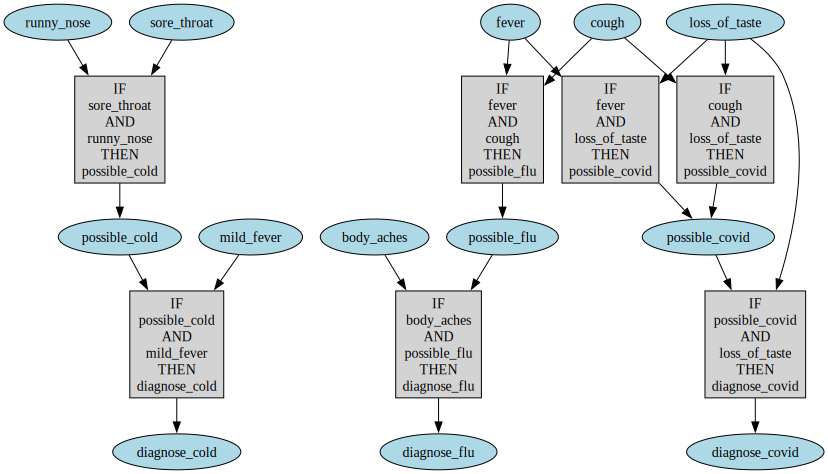

In [12]:
# Visualize the knowledge base with Graphviz
visualizer = Visualizer(kb)
visualizer.visualize("expert_system_visualization")